In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import cv2

In [56]:
data_path = r'D:\NCI\sem 2\ML_2\final_datasets\all'

Loading the data

In [127]:
data = tf.keras.utils.image_dataset_from_directory(
    directory= r'D:\NCI\sem 2\ML_2\final_datasets\all',
    color_mode='rgb',
    seed=12,
    batch_size = 32
      )

Found 3601 files belonging to 2 classes.


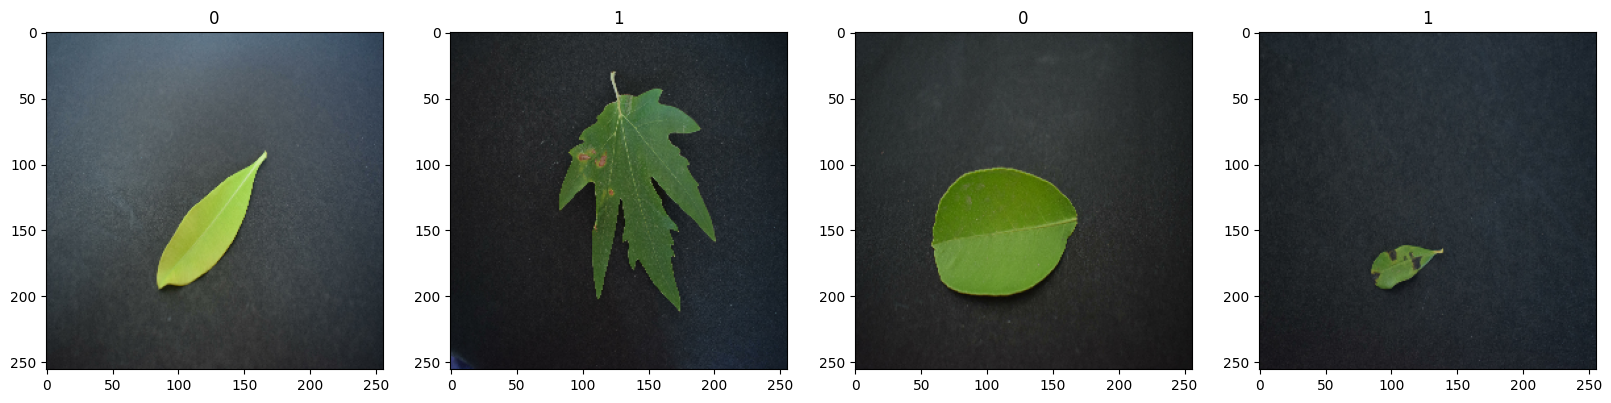

In [107]:
numpy_data_iter = data.as_numpy_iterator()
one_batch = numpy_data_iter.next()
figure, axis = plt.subplots(ncols=4, figsize=(20,20))
for id, imgage in enumerate(one_batch[0][:4]):
    axis[id].imshow(imgage.astype(int))
    axis[id].title.set_text(one_batch[1][id])

#1 - Diseased Leave
#0 - Healthy Leave

Preprocessing

In [128]:
#Scaling of the data
data = data.map(lambda x,y: (x/255, y))

Splitting of the data

In [129]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.2)

In [130]:
print('Note: Each batch contains approx : 32 images')
print('Total Batches in all the data = ', len(data))
#in batches, each batch has 32 images
print(f'train_batch_size = {train_size}, test_batch_size = {test_size} , Validation_batch_size  = {val_size}')

Note: Each batch contains approx : 32 images
Total Batches in all the data =  113
train_batch_size = 79, test_batch_size = 22 , Validation_batch_size  = 11


In [131]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [72]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Building the model

In [138]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [139]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_12 (Conv2D)          (None, 252, 252, 16)      2320      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 126, 126, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 124, 124, 32)     

# 7. Train

In [141]:
logdir=r'D:\NCI\sem 2\ML_2\logs'

In [142]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [144]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
79/79 [==============================] - 397s 5s/step - loss: 2.0605 - accuracy: 0.6187 - val_loss: 16.4609 - val_accuracy: 0.4886
Epoch 2/10
79/79 [==============================] - 374s 5s/step - loss: 0.5881 - accuracy: 0.6982 - val_loss: 16.7922 - val_accuracy: 0.5057
Epoch 3/10
79/79 [==============================] - 360s 4s/step - loss: 0.5353 - accuracy: 0.7456 - val_loss: 15.4824 - val_accuracy: 0.5227
Epoch 4/10
79/79 [==============================] - 1241s 16s/step - loss: 0.4761 - accuracy: 0.7812 - val_loss: 6.1345 - val_accuracy: 0.5710
Epoch 5/10
79/79 [==============================] - 391s 5s/step - loss: 0.4473 - accuracy: 0.7896 - val_loss: 3.4187 - val_accuracy: 0.5398
Epoch 6/10
79/79 [==============================] - 362s 4s/step - loss: 0.4244 - accuracy: 0.8121 - val_loss: 0.5566 - val_accuracy: 0.7159
Epoch 7/10
79/79 [==============================] - 23068s 296s/step - loss: 0.4149 - accuracy: 0.8113 - val_loss: 0.4065 - val_accuracy: 0.8295
Epoc

In [145]:
model.save(r'D:\NCI\sem 2\ML_2\custom_cnn_final_model.h5')

c:\Users\syeda\anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 8. Plot Performance

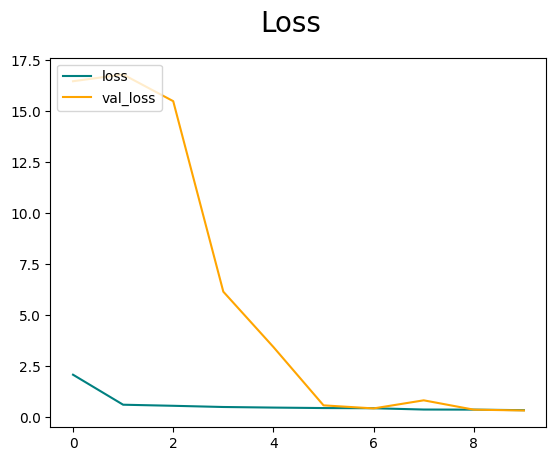

In [146]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

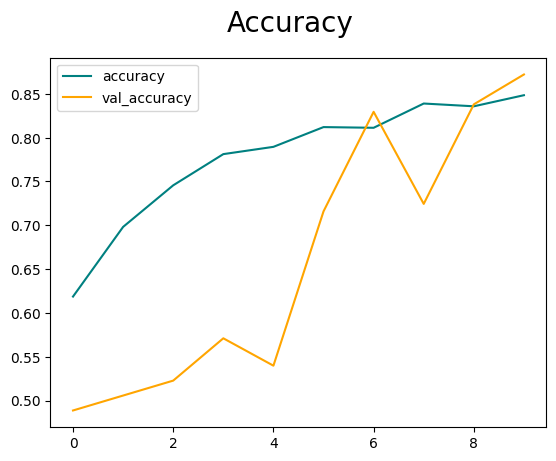

In [147]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [148]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [149]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [150]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 523ms/step


In [151]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.8550296 0.8352601 0.8494318


Testing on an image

In [2]:
from keras.models import load_model
model = load_model(r'D:\NCI\sem 2\ML_2\model\custom_cnn_final_model.h5')

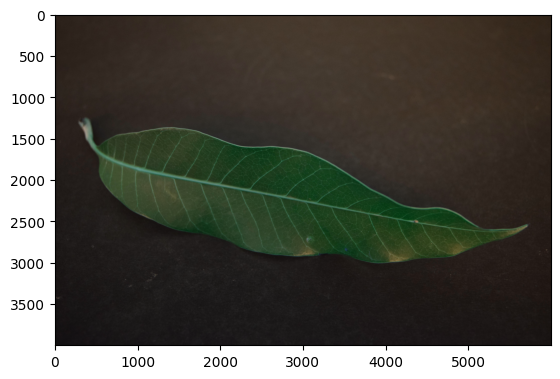

In [10]:
img = cv2.imread(r"D:\NCI\sem 2\ML_2\final_datasets\all\healthy\0001_0032.JPG")
plt.imshow(img)
plt.show()

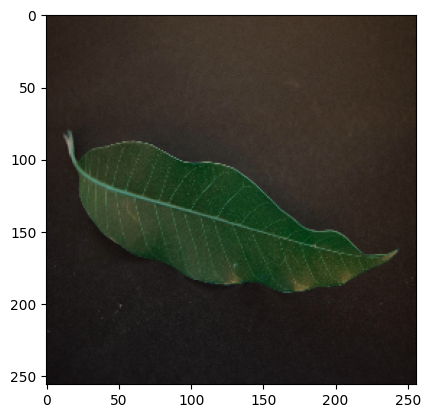

In [11]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [12]:
y_predec = model.predict(np.expand_dims(resize/255, 0))

if y_predec > 0.5: 
    print(f'Predicted class is disease')
else:
    print(f'Predicted class is Non disease')

1/1 [==============================] - 0s 63ms/step
Predicted class is Non disease
